In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

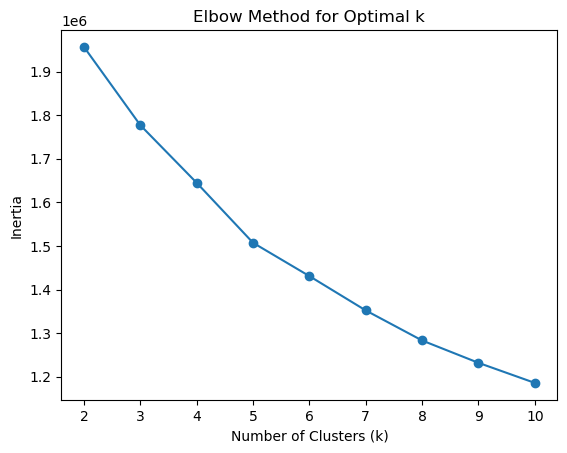

In [18]:
spotify_data = pd.read_csv("spotifydata.csv")

#pick number columns, not the categorical ones
X = spotify_data.select_dtypes(include=[np.number])

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#do 8 dimensions for PCA 

#Apply PCA ( if too many dimensions)
pca = PCA(n_components=0.95)  #Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

#Determine optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(2, 11)  #Checking clusters from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

#Plot Elbow Method to choose k 
#only works in Jupyter/Matplotlib environment
import matplotlib.pyplot as plt
plt.plot(cluster_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

#Fit KMeans with optimal k (Assume k=6 from the elbow method; need to be discussed)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

#Add cluster labels to the dataset
spotify_data["Cluster"] = clusters

In [21]:
#Recommendation system function
def recommend_songs(song_name, num_recommendations=5):
    #firstly, song should be in the data
    if song_name not in spotify_data["name"].values:
        print("Song not found in dataset.")
        return []

    #Find the cluster of the given song
    song_cluster = spotify_data.loc[spotify_data["name"] == song_name, "Cluster"].values[0]

    #Get other songs in the same cluster
    similar_songs = spotify_data[spotify_data["Cluster"] == song_cluster]

    #Exclude the input song and randomly pick recommendations
    recommendations = similar_songs[similar_songs["name"] != song_name].sample(n=num_recommendations, random_state=42)
    
    return recommendations[["name", "artists"]]

#Example:
print(recommend_songs("Poison Arrow"))

                                                     name  \
100746                   Kiss Kiss Kiss - Remastered 2010   
148690                             El Alma de Las Fiestas   
11330                         I'm the One - 2015 Remaster   
9162    Sgt. Pepper's Lonely Hearts Club Band - Repris...   
64186                                     Walkin' the Dog   

                                 artists  
100746                      ['Yoko Ono']  
148690  ['El Gran Combo De Puerto Rico']  
11330                      ['Van Halen']  
9162                     ['The Beatles']  
64186                     ['The Sonics']  
